# ゼミ

    4月28日　太田　康之

## 報告内容
- 前回（4/15）の課題
    - amp_65パターンの比較
        - ノンパラメトリック検定
        - ウィルコクスン順位和検定
        - コルモゴロフ-スミルノフ検定
        - 適合度検定
        - 特異スペクトル変換法
            
            **井手・杉山,異常検知と変化検知,(2015) 部分空間法による変化検知**
           
         <!---img src = "image/book_ijoukenchi_henkakenchi_s.png" --->
         

## アドバイス頂きたいこと

- パターン抽出の手法について

    - 特異スペクトル変換法
<!--- img src ="image/fig_sindenzu_org.png" --->

<!--- img src ="image/fig_sindenzu_treat.png" --->

    - 計算コストを要する

# 取り扱うデータについて 

- 題材として製品Nから製品Cに切替えをおこなった際の時系列データについて分析を行った

日付|製品|（DATA）|良品数|不良品数|製造中断時間|備考
-|-|-|-|-|-|-
200120|N|200121|200|58|1260min|切替え、生産開始21:00～不良多い
200121|N|200122|1480|178|50min|洗浄（16:00～16:50）
200129|N,C|200130|1260|233|200min|切替え（15:10～17:00）色抜き追加（18:00～19:40）


In [23]:
#使用ライブラリ
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import time
import numpy as np
from numpy.linalg import svd #matrix_rank

#使用ディレクトリ
# Current_ dir = sugisemi/semi_200428/
OUTPUT = './output'
ORGDATA = '../../no7/output/data_pickles' #_65.pkl, PKL_LIST.txt
IMAGE = './image'

In [15]:
# os.listdir('../../no7/data_org')

## ノンパラメトリック検定　python

In [18]:
SELECT_DATE = ['200121', '200122', '200130']

In [24]:
DATE = {}
DATA = {}
for i in range(len(SELECT_DATE)):
    DATE[i] = pd.read_pickle(ORGDATA + '/'+ SELECT_DATE[i] + '_65.pkl')
    DATA[i] = DATE[i][['time', 'rpv_65', 'amp_65']] 

In [25]:
DATA[i].head(2)

,time,rpv_65,amp_65
0,2020-01-29 00:00:00,13.1,44.47
1,2020-01-29 00:00:01,13.1,45.70


In [69]:
# import datetime as dt
DATA_SPLIT = {}
for i in range(len(DATA)):
    HOUR = {} #連番変数の設定
    turn = 1 # n時間区切り　n=1
    D = DATA[i].loc[0,'time']
    for j in range(0,23,turn):
        ST_COUNT = dt.datetime(D.year,D.month,D.day,j,0,0)
        if j + turn == 24:
            EN_COUNT = dt.datetime(D.yearD.month,D.day,23,59,59)
        else:
            EN_COUNT = dt.datetime(D.year,D.month,D.day,j + turn,0,0)
        HOUR[j] = DATA[i][(DATA[i]['time']>=ST_COUNT) & (DATA[i]['time']<EN_COUNT)]
    DATA_SPLIT[i] = HOUR

In [31]:
import numpy as np
from scipy import stats

In [146]:
DATA_SPLIT2 = {}
DATA_SPLIT2[0] = []
DATA_SPLIT2[0] = [[np.append(DATA_SPLIT2[0],DATA_SPLIT[i][j]) for j in range(len(DATA_SPLIT[i]))] for i in range(2)]

In [147]:
DATA_SPLIT2[1] = DATA_SPLIT[2]

In [149]:
len(DATA_SPLIT2[0])

2

In [142]:
A = [[np.array(DATA_SPLIT2[j][i]['amp_65']) for i in range(len(DATA_SPLIT2[j]))]for j in range(len(DATA_SPLIT2))]

TypeError: list indices must be integers or slices, not str

In [123]:
U = [[[stats.wilcoxon(A[i][j], A[i][k], zero_method = 'zsplit').pvalue for k in range(23)] for j in range(23)] for i in range (3)]

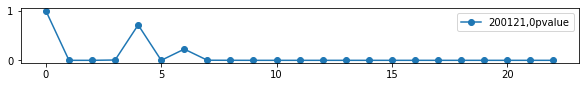

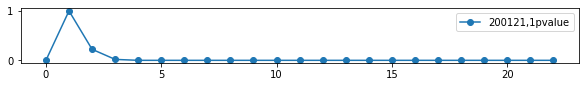

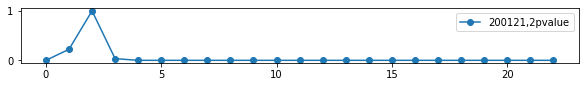

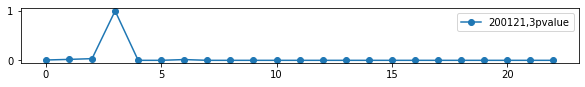

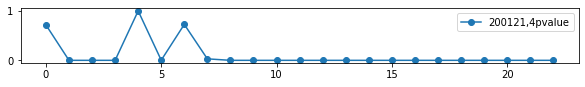

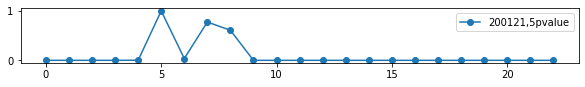

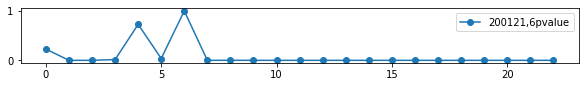

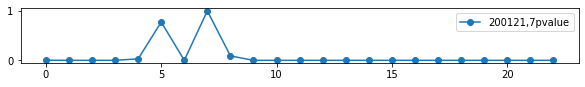

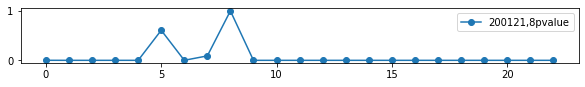

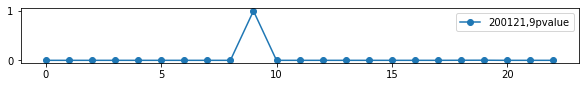

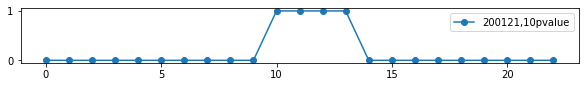

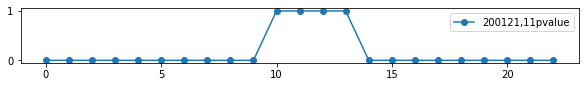

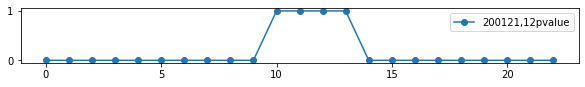

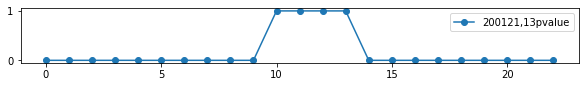

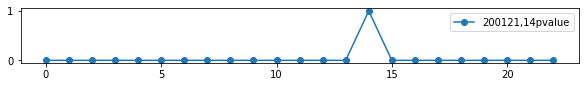

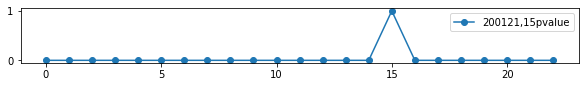

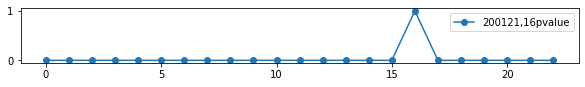

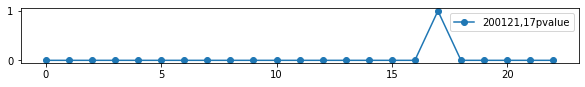

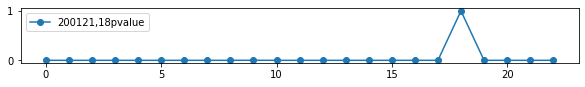

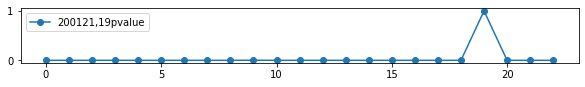

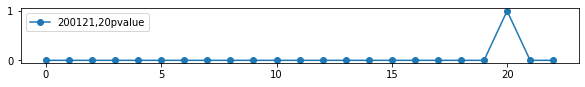

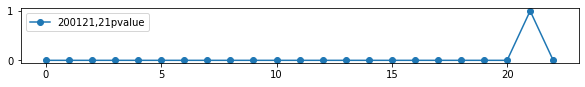

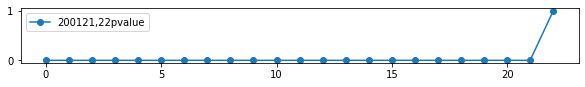

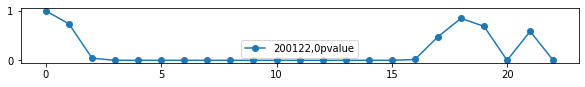

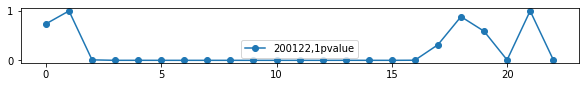

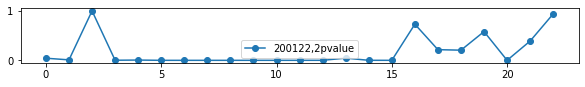

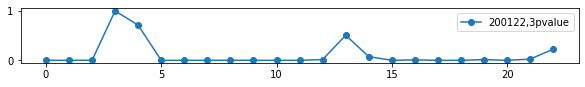

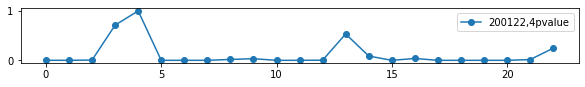

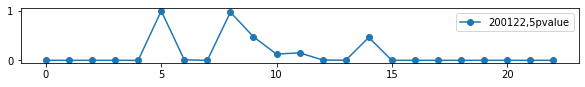

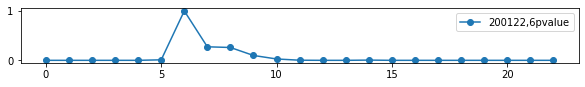

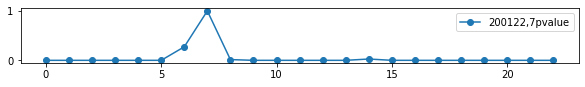

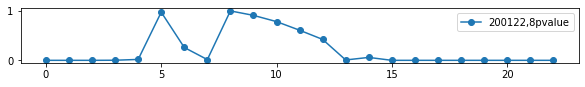

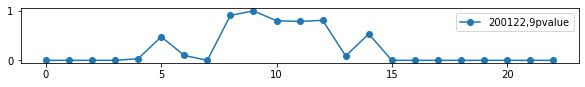

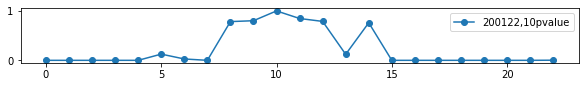

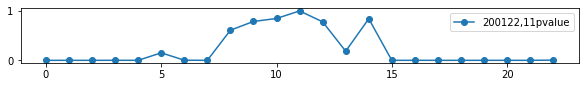

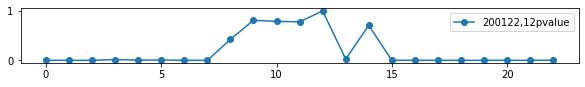

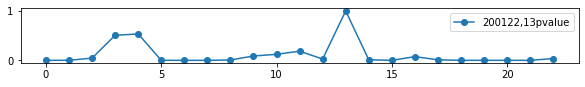

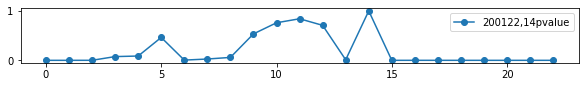

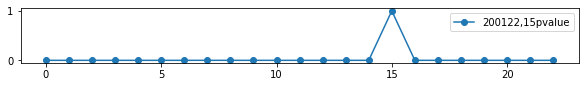

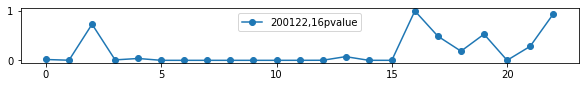

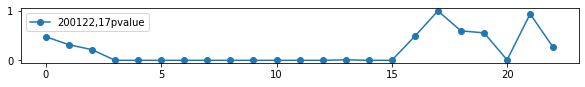

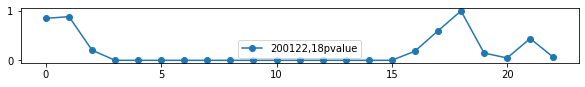

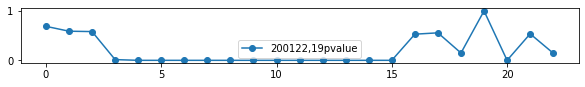

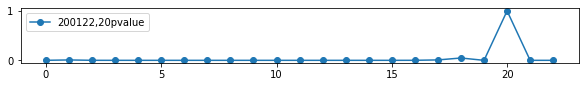

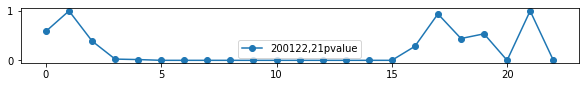

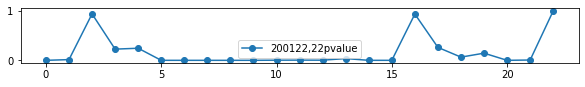

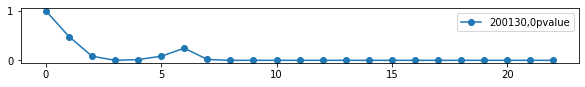

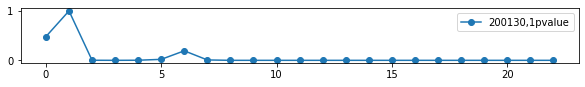

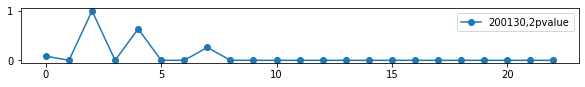

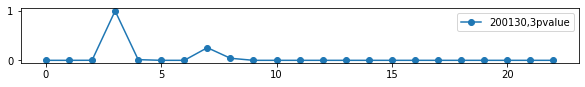

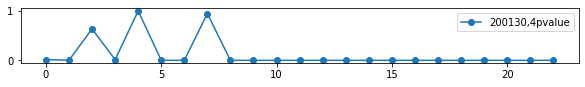

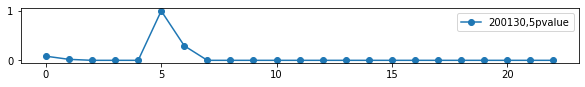

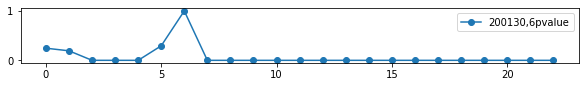

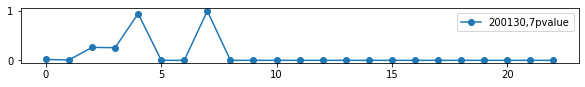

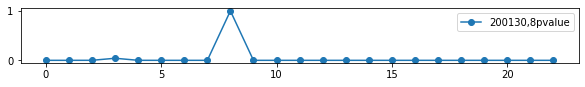

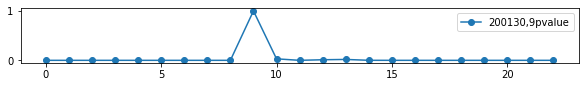

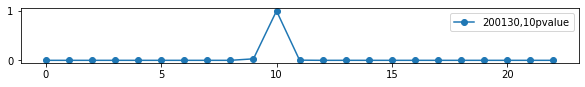

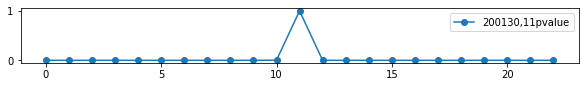

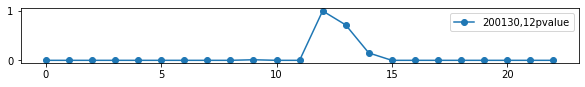

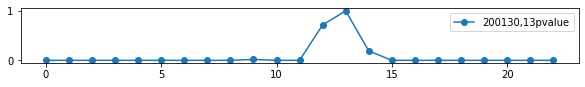

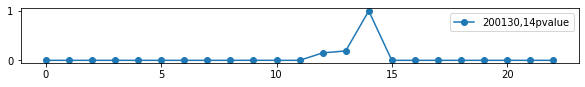

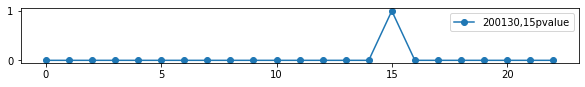

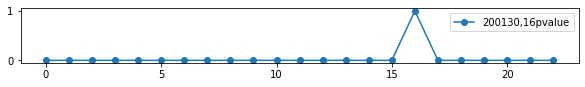

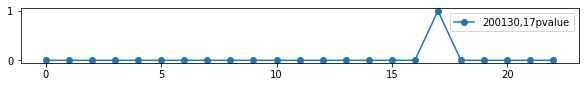

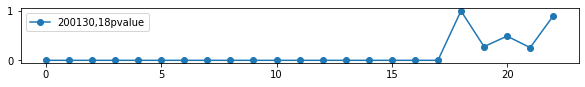

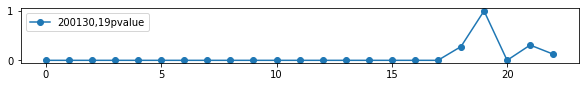

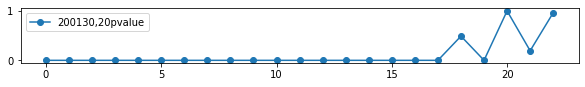

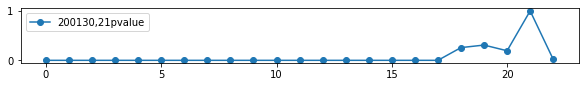

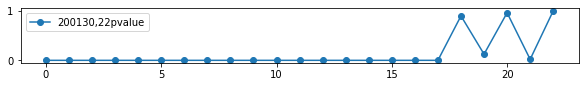

In [133]:
for i in range(3):
    for j in range(23):
        plt.figure(figsize= ([10,1]))
        plt.plot(U[i][j], marker = 'o', label = "{},{}pvalue".format(SELECT_DATE[i],j))
        plt.legend()
        plt.show()

In [60]:
turn = 1
for i, data in enumerate(DATA):
    HOUR = data
    plt.figure(figsize = [25,4])
    for k in range(0,23,turn):
        plt.hist(HOUR[k]['amp_65']+4*k, bins = 250, color = 'b',alpha = 0.2, density = False, range = (40,140))
        plt.ylim(0,1000)
        plt.title(SELECT_DATE[i])
    plt.show()

TypeError: 'int' object is not subscriptable

<Figure size 1800x288 with 0 Axes>